## Librerías

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

## Importa

#### Auxiliares

In [116]:
corr_cities=pd.read_csv('CorrectedCitiesDOI.csv',sep=';',encoding='utf8',low_memory=False)
corr_cities.head(3)

,MAIN_ADDR_TOWN,MAIN_ADDR_GEO_ZONE,MAIN_ADDR_COUNTRY,NEW_MAIN_ADDR_TOWN,NEW_MAIN_ADDR_GEO_ZONE,NEW_MAIN_ADDR_COUNTRY
0,0,Antioquia,Colombia,Medellín,Antioquia,Colombia
1,0,Bogotá D.C.,Colombia,Bogotá D.C.,Bogotá D.C.,Colombia
2,0,Bogotá D.C.,Colombia,Bogotá D.C.,Bogotá D.C.,Colombia


In [122]:
promos=pd.read_csv('GroupedPromotionsFamilyTopics.csv',sep=';',encoding='utf8',low_memory=False)
promos.Nuevo=promos.Nuevo.str.lower()
promos['Nuevo_light']=promos.Nuevo.apply(lambda x: 'descuento' if 'descuento' in x else x)
promos.head(3)

,PROMOTION,Nuevo,Nuevo_light
0,PROMO DIAS DE MAGIA DISNEY CALI 15%,15% descuento,descuento
1,Brilla Tiempo 20% Taq,20% descuento,descuento
2,CATEGORIA B,cajas de compensación,cajas de compensación


In [133]:
promos.Nuevo_light.value_counts()

descuento                213
convenio                  24
cajas de compensación     19
paquete                   13
preventa                  12
etapas de venta           11
redención                  8
Name: Nuevo_light, dtype: int64

In [131]:
pd.DataFrame(promos.groupby(['Nuevo_light','Nuevo']).size())

0
Nuevo_light           Nuevo                    
cajas de compensación cajas de compensación  19
convenio              convenio               24
descuento             10% descuento          21
                      15% descuento          39
                      20% descuento          48
                      25% descuento          24
                      30% descuento          27
                      35% descuento           3
                      50% descuento           7
                      descuento corporativo   8
                      descuentos             36
etapas de venta       etapas de venta        11
paquete               paquete                13
preventa              preventa               12
redención             redención               8

#### Principal

In [157]:
db=pd.read_csv('Datamart_SalesAndContacts_FamilyTopics_v2.csv',sep=';',encoding='utf8',low_memory=False)
db

,T_PRODUCT_ID,PRODUCT,PRODUCT_CODE,ORGANIZATION,INVOICE_CONTACT_FMT_NAME,TOPIC,SUB_TOPIC,PRODUCT_DATE_TIME,ORDER_DATE_TIME,SALES_CHANNEL_TYPE,...,MAIN_ADDR_COUNTRY,MAIN_ADDR_ZIPCODE,ORDER_TYPE,ORDER_NUMBER,TAX_RATE,SSO_PROVIDER,FILE_STATE,IP_ADDRESS,INSURED,INSURED_AMT_ITX
0,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,01/06/2019 12:44:22,Taquillas,...,Colombia,080001,SALE,287725,0,NaN,Anulado,NaN,F,0.0
1,101334930342,Circo de Dinosaurios,TDINOBQ,Tuboleta.com,WILMER GRANDA ( 103494 ),Familia,Infantil,21/06/2019 17:00:00,14/06/2019 11:17:44,Taquillas,...,Colombia,080001,SALE,339825,0,NaN,Anulado,NaN,F,0.0
2,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,28/11/2019 16:32:00,Taquillas,...,Colombia,080001,SALE,1212332,0,NaN,Anulado,NaN,F,0.0
3,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,08/11/2019 12:00:30,Taquillas,...,Colombia,080001,REFUND_CLIENT,1028739,0,NaN,Anulado,NaN,F,0.0
4,101365180246,Juan Caracol Teatro Musical,CGJCARA,Tuboleta.com,NaN,Familia,Infantil,15/12/2019 16:00:00,29/11/2019 17:17:17,Taquillas,...,Colombia,080001,REFUND_CLIENT,1220711,0,NaN,Anulado,NaN,F,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353261,10229196706821,DISNEY ON ICE 100 AÑOS DE MAGIA,BDOI2023,TBL LIVE S.A.S,TBL LIVE SAS ( 74 ),12. PARQUES Y FAMILIARES MOVISTAR ARENA,FAMILIAR,08/09/2023 15:00:00,23/06/2023 17:02:35,Internet gran público,...,Colombia,111111,SALE,20482102,0,NaN,Pagado,152.200.172.243,F,0.0
353262,10228438098249,Pacificanto - Historia de Navidad,BPACIFIC,Tuboleta.com,ILUMINACIÓN Y MONTAJE SAS ( 6068618 ),Familia,Familiar,NaN,11/12/2021 19:13:37,Internet gran público,...,Colombia,1,SALE,7102802,0,NaN,Pagado,186.102.71.28,T,1747.0
353263,10228488690357,Viajeros insólitos,BGVIAJE,Idartes,IDARTES - PLANETARIO ( 265594 ),Familia,Familia,20/11/2022 17:00:00,19/11/2022 11:33:09,Internet gran público,...,Colombia,1,SALE,15917002,0,NaN,Pagado,190.109.20.169,T,2312.0
353264,10228438098249,Pacificanto - Historia de Navidad,BPACIFIC,Tuboleta.com,ILUMINACIÓN Y MONTAJE SAS ( 6068618 ),Familia,Familiar,NaN,11/12/2021 19:26:16,Internet gran público,...,Colombia,1,SALE,7102965,0,NaN,Pagado,186.102.71.28,T,2828.0


## Transformación

In [158]:
db.PRODUCT = db.PRODUCT.str.lower()

In [197]:

db['ORDER_DATE_TIME2']=[datetime.strptime(db.ORDER_DATE_TIME[i], '%d/%m/%Y %H:%M:%S') for i in range(len(db))]
db['ORDER_DATE_TIME2'][0]

Timestamp('2019-06-01 12:44:22')

In [159]:
db=pd.merge(db,promos[['PROMOTION','Nuevo_light']],how='left',on='PROMOTION').rename(columns={'Nuevo_light':'PROMOTION2'})
db.PROMOTION2=db.PROMOTION2.fillna('sin_descuento')
# db[['PROMOTION','PROMOTION2']].value_counts(dropna=False)
db.PROMOTION2.value_counts(dropna=False)

NaN                      291110
descuento                 34960
convenio                   9033
etapas de venta            6494
preventa                   4457
cajas de compensación      4091
paquete                    1609
redención                  1512
Name: PROMOTION2, dtype: int64

In [165]:
(db.PROMOTION2.value_counts(dropna=False)/len(db))

sin_descuento            0.824053
descuento                0.098962
convenio                 0.025570
etapas de venta          0.018383
preventa                 0.012617
cajas de compensación    0.011581
paquete                  0.004555
redención                0.004280
Name: PROMOTION2, dtype: float64

## Discovery

In [100]:
a=(pd.DataFrame(db.PRODUCT.value_counts()).reset_index(names='show'))
a[a.show.str.contains('ice')]

,show,PRODUCT
3,disney on ice medellin,18554
5,disney on ice cali,13287
9,disney on ice 100 años de magia,7901
19,peter pan on ice,3643
115,i festival de narices en las tablas - varietté...,133
134,la vida invisible de eurídice gusmão,77
162,christmas on ice,53


In [99]:
db[db.PRODUCT.str.contains('disney')].groupby(['PRODUCT','PRODUCT_DATE_TIME','PERFORMANCE_QUOTA']).agg({'PRODUCT':'count'})

PRODUCT
PRODUCT                          PRODUCT_DATE_TIME   PERFORMANCE_QUOTA         
disney junior en vivo            10/06/2023 10:00:00 6435.0                1079
                                 10/06/2023 15:30:00 6435.0                1406
                                 10/06/2023 19:00:00 6435.0                 745
disney junior en vivo - medellín 27/05/2023 11:00:00 1702.0                 142
                                 27/05/2023 14:00:00 1702.0                 198
                                 28/05/2023 11:00:00 1702.0                 166
                                 28/05/2023 14:00:00 1702.0                 239
disney on ice 100 años de magia  05/09/2023 19:00:00 7976.0                 314
                                                     8110.0                 176
                                                     8344.0                 334
                                 06/09/2023 18:30:00 7537.0                 275
                                                     8110.0                 418
                                 07/09/2023 18:30:00 7959.0                 311
                                                     8110.0                 179
                                                     8432.0                 374
                                 08/09/2023 15:00:00 8110.0                 186
                                                     8182.0                 317
                                                     8464.0                 440
                                 08/09/2023 19:00:00 7316.0                 477
                                                     7519.0                 866
                                 09/09/2023 11:00:00 7891.0                 249
                                                     8110.0                 171
                                                     8464.0                 362
                                 09/09/2023 15:00:00 8021.0                 388
                                                     8110.0                 242
                                                     8384.0                 505
                                 10/09/2023 10:30:00 7960.0                 340
                                                     8110.0                 181
                                                     8464.0                 414
                                 10/09/2023 18:30:00 7924.0                 144
                                                     8110.0                  63
                                                     8305.0                 175
disney on ice cali               03/07/2019 19:00:00 7928.0                1264
                                 04/07/2019 15:00:00 7928.0                 830
                                 04/07/2019 19:00:00 7928.0                1530
                                 05/07/2019 11:00:00 7928.0                  87
                                 05/07/2019 15:00:00 7928.0                1425
                                 05/07/2019 19:00:00 7928.0                1078
                                 06/07/2019 11:00:00 7928.0                 778
                                 06/07/2019 15:00:00 7928.0                 774
                                 06/07/2019 19:00:00 7928.0                1348
                                 07/07/2019 11:00:00 7928.0                1034
                                 07/07/2019 15:00:00 7928.0                1381
                                 07/07/2019 19:00:00 7928.0                1758
disney on ice medellin           10/07/2019 19:00:00 5914.0                1623
                                 11/07/2019 15:00:00 5931.0                1320
                                 11/07/2019 19:00:00 5931.0                1818
                                 12/07/2019 11:00:00 6051.0                  91
                                 12/07/2019 15:00:00 5931.0             

In [112]:
# lista_contains=['disney on ice medellin','disney on ice cali','disney on ice 100 años de magia','peter pan on ice']
lista_contains=['disney on ice medellin','disney on ice cali','disney on ice 100 años de magia']
a=db[db.PRODUCT.isin(lista_contains)].groupby(['PRODUCT','PRODUCT_DATE_TIME','PERFORMANCE_QUOTA']).agg({'PRODUCT':'count'})
a

PRODUCT
PRODUCT                         PRODUCT_DATE_TIME   PERFORMANCE_QUOTA         
disney on ice 100 años de magia 05/09/2023 19:00:00 7976.0                 314
                                                    8110.0                 176
                                                    8344.0                 334
                                06/09/2023 18:30:00 7537.0                 275
                                                    8110.0                 418
                                07/09/2023 18:30:00 7959.0                 311
                                                    8110.0                 179
                                                    8432.0                 374
                                08/09/2023 15:00:00 8110.0                 186
                                                    8182.0                 317
                                                    8464.0                 440
                                08/09/2023 19:00:00 7316.0                 477
                                                    7519.0                 866
                                09/09/2023 11:00:00 7891.0                 249
                                                    8110.0                 171
                                                    8464.0                 362
                                09/09/2023 15:00:00 8021.0                 388
                                                    8110.0                 242
                                                    8384.0                 505
                                10/09/2023 10:30:00 7960.0                 340
                                                    8110.0                 181
                                                    8464.0                 414
                                10/09/2023 18:30:00 7924.0                 144
                                                    8110.0                  63
                                                    8305.0                 175
disney on ice cali              03/07/2019 19:00:00 7928.0                1264
                                04/07/2019 15:00:00 7928.0                 830
                                04/07/2019 19:00:00 7928.0                1530
                                05/07/2019 11:00:00 7928.0                  87
                                05/07/2019 15:00:00 7928.0                1425
                                05/07/2019 19:00:00 7928.0                1078
                                06/07/2019 11:00:00 7928.0                 778
                                06/07/2019 15:00:00 7928.0                 774
                                06/07/2019 19:00:00 7928.0                1348
                                07/07/2019 11:00:00 7928.0                1034
                                07/07/2019 15:00:00 7928.0                1381
                                07/07/2019 19:00:00 7928.0                1758
disney on ice medellin          10/07/2019 19:00:00 5914.0                1623
                                11/07/2019 15:00:00 5931.0                1320
                                11/07/2019 19:00:00 5931.0                1818
                                12/07/2019 11:00:00 6051.0                  91
                                12/07/2019 15:00:00 5931.0                2164
                                12/07/2019 19:00:00 5931.0                1340
                                13/07/2019 11:00:00 5931.0                1452
                                13/07/2019 15:00:00 5931.0                1718
                                13/07/2019 19:00:00 5931.0                1590
                                14/07/2019 11:00:00 5931.0                1654
                                14/07/2019 15:00:00 5931.0                1465
                                14/07/2019 19:00:00 5931.0                2319

In [114]:
lista_contains

['disney on ice medellin',
 'disney on ice cali',
 'disney on ice 100 años de magia']

In [168]:
db[db.PRODUCT.isin(lista_contains)].groupby(['PRODUCT','PROMOTION2']).agg({'PRODUCT':'count'})

PRODUCT
PRODUCT                         PROMOTION2              
disney on ice 100 años de magia convenio             497
                                descuento            607
                                etapas de venta     6408
                                sin_descuento        389
disney on ice cali              descuento           6247
                                paquete              802
                                redención             47
                                sin_descuento       6191
disney on ice medellin          descuento           8112
                                paquete              502
                                redención            428
                                sin_descuento       9512

In [294]:
def graph_producto(producto:str,ymax:int=4000):
    aux=db[(db.PRODUCT==producto)]
    plt.figure(figsize=(10,3))
    ax=sns.histplot(data=aux,x='ORDER_DATE_TIME2',hue='PROMOTION2',bins=30,multiple="stack",element='step')

    plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),ymin=0,ymax=ymax,linestyles='dotted',colors='red')
    plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=30),ymin=0,ymax=ymax,linestyles='dotted',colors='blue')
    plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=60),ymin=0,ymax=ymax,linestyles='dotted',colors='magenta')
    plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=90),ymin=0,ymax=ymax,linestyles='dotted',colors='green')
    plt.hlines(y=500,xmin=aux.ORDER_DATE_TIME2.min(),
            xmax=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),linestyles='dotted',colors='black')

    plt.title(producto)
    sns.move_legend(ax,loc='upper left')
    plt.xticks(rotation=90)
    plt.show();

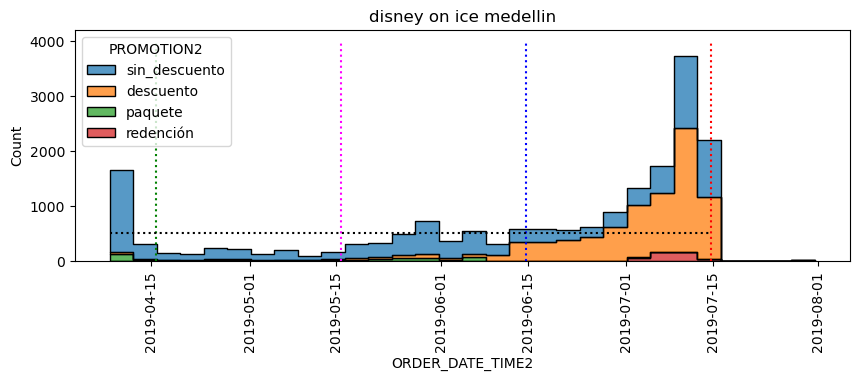

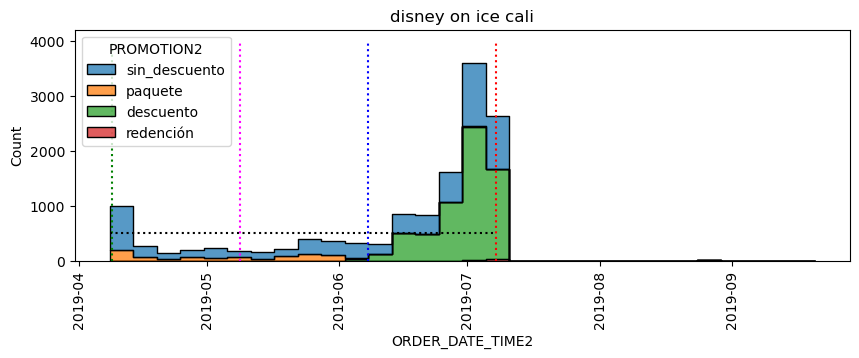

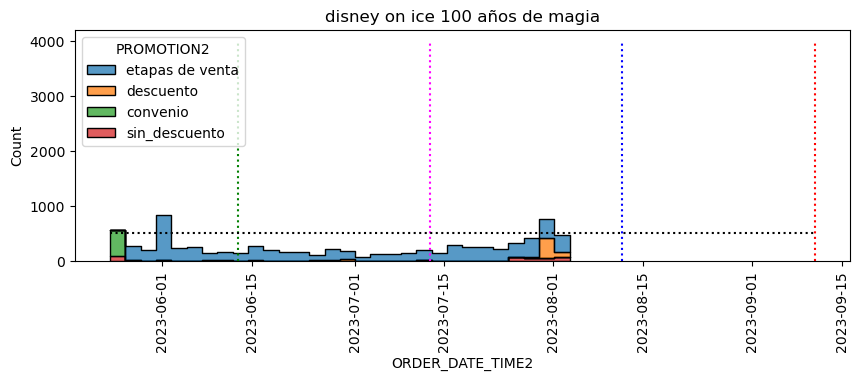

In [295]:
for i in lista_contains:
    graph_producto(i)

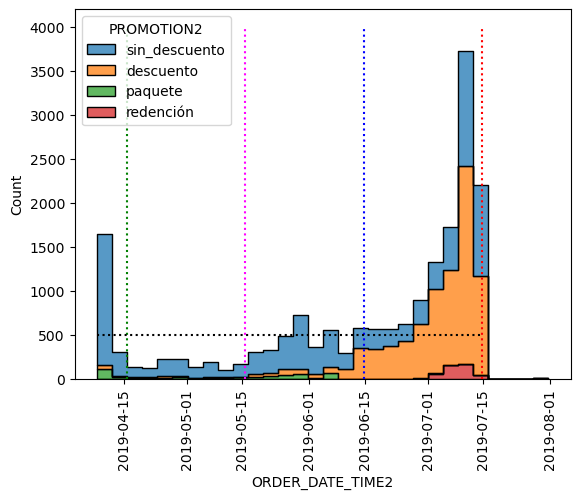

In [284]:
ymax=4000
# aux=db[(db.PRODUCT=='disney on ice medellin') & (db.PROMOTION2=='descuento')]
aux=db[(db.PRODUCT=='disney on ice medellin')]
ax=sns.histplot(data=aux,x='ORDER_DATE_TIME2',hue='PROMOTION2',bins=30,multiple="stack",element='step')

plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),ymin=0,ymax=ymax,linestyles='dotted',colors='red')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=30),ymin=0,ymax=ymax,linestyles='dotted',colors='blue')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=60),ymin=0,ymax=ymax,linestyles='dotted',colors='magenta')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=90),ymin=0,ymax=ymax,linestyles='dotted',colors='green')
plt.hlines(y=500,xmin=aux.ORDER_DATE_TIME2.min(),
           xmax=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),linestyles='dotted',colors='black')

sns.move_legend(ax,loc='upper left')
plt.xticks(rotation=90);

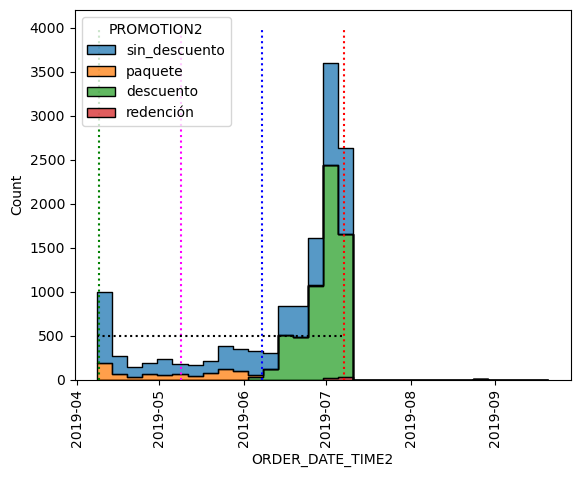

In [286]:
# aux=db[(db.PRODUCT=='disney on ice cali') & (db.PROMOTION2=='descuento')]
aux=db[(db.PRODUCT=='disney on ice cali')]
ax=sns.histplot(data=aux,x='ORDER_DATE_TIME2',hue='PROMOTION2',bins=30,multiple="stack",element='step')

plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),ymin=0,ymax=ymax,linestyles='dotted',colors='red')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=30),ymin=0,ymax=ymax,linestyles='dotted',colors='blue')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=60),ymin=0,ymax=ymax,linestyles='dotted',colors='magenta')
plt.vlines(x=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max()-timedelta(days=90),ymin=0,ymax=ymax,linestyles='dotted',colors='green')
plt.hlines(y=500,xmin=aux.ORDER_DATE_TIME2.min(),
           xmax=aux.PRODUCT_DATE_TIME.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S')).max(),linestyles='dotted',colors='black')

sns.move_legend(ax,loc='upper left')
plt.xticks(rotation=90);

<Axes: xlabel='PRODUCT,PRODUCT_DATE_TIME,PERFORMANCE_QUOTA'>

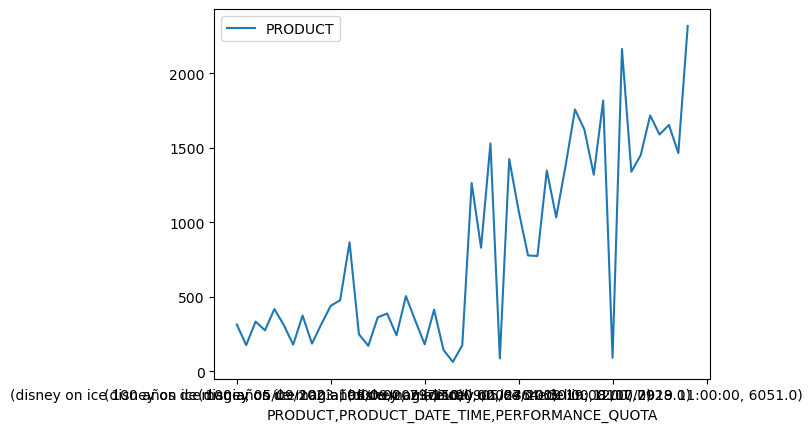

In [113]:
sns.

In [107]:
db[db.PRODUCT.str.contains('disney')].groupby(['PRODUCT','PRODUCT_DATE_TIME','PERFORMANCE_QUOTA']).agg({'PRODUCT':'count'}).rename(columns={'PRODUCT','SUM'})

TypeError: 'set' object is not callable

In [95]:
db[db.PRODUCT.str.contains('disney')].groupby(['PRODUCT','PERFORMANCE_QUOTA']).agg({'PRODUCT':'count'})

PRODUCT
PRODUCT                          PERFORMANCE_QUOTA         
disney junior en vivo            6435.0                3230
disney junior en vivo - medellín 1702.0                 745
disney on ice 100 años de magia  7316.0                 477
                                 7519.0                 866
                                 7537.0                 275
                                 7891.0                 249
                                 7924.0                 144
                                 7959.0                 311
                                 7960.0                 340
                                 7976.0                 314
                                 8021.0                 388
                                 8110.0                1616
                                 8182.0                 317
                                 8305.0                 175
                                 8344.0                 334
                                 8384.0                 505
                                 8432.0                 374
                                 8464.0                1216
disney on ice cali               7928.0               13287
disney on ice medellin           5914.0                1623
                                 5931.0               16840
                                 6051.0                  91
zonas vip - disney junior.       711.0                  140

In [96]:
db[db.PRODUCT.str.contains('disney junior en vivo')].groupby(['PRODUCT','PERFORMANCE_QUOTA','SEAT_CATEGORY']).agg({'PRODUCT':'count'})

PRODUCT
PRODUCT                          PERFORMANCE_QUOTA SEAT_CATEGORY         
disney junior en vivo            6435.0            1.0                165
                                                   3.0                454
                                                   4.0                806
                                                   5.0                318
                                                   6.0               1038
                                                   7.0                412
                                                   8.0                 37
disney junior en vivo - medellín 1702.0            1.0                211
                                                   2.0                127
                                                   3.0                200
                                                   4.0                207

In [90]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353266 entries, 0 to 353265
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   T_PRODUCT_ID              353266 non-null  int64  
 1   PRODUCT                   353266 non-null  object 
 2   PRODUCT_CODE              353266 non-null  object 
 3   ORGANIZATION              353266 non-null  object 
 4   INVOICE_CONTACT_FMT_NAME  351500 non-null  object 
 5   TOPIC                     353266 non-null  object 
 6   SUB_TOPIC                 353266 non-null  object 
 7   PRODUCT_DATE_TIME         273274 non-null  object 
 8   ORDER_DATE_TIME           353266 non-null  object 
 9   SALES_CHANNEL_TYPE        353266 non-null  object 
 10  SALES_CHANNEL             353266 non-null  object 
 11  LOGICAL_SEAT_CATEGORY     127259 non-null  object 
 12  SEAT_CATEGORY             127259 non-null  float64
 13  SITE                      353003 non-null  o

In [48]:
db.columns

Index(['T_PRODUCT_ID', 'PRODUCT', 'PRODUCT_CODE', 'ORGANIZATION',
       'INVOICE_CONTACT_FMT_NAME', 'TOPIC', 'SUB_TOPIC', 'PRODUCT_DATE_TIME',
       'ORDER_DATE_TIME', 'SALES_CHANNEL_TYPE', 'SALES_CHANNEL',
       'LOGICAL_SEAT_CATEGORY', 'SEAT_CATEGORY', 'SITE', 'TOWN',
       'T_ORDER_CONTACT_ID', 'FILE_NUMBER', 'UNIT_AMT_ITX', 'UNIT_AMT_ETX',
       'PROMOTION', 'AUDIENCE_SUB_CATEGORY', 'NET_SOLD_TKT_AMT_ITX',
       'NET_SOLD_C_QTY', 'NET_SOLD_T_QTY', 'PERFORMANCE_QUOTA', 'DN_QUOTA',
       'BASE', 'T_CONTACT_ID', 'ADDRESS_SALUTATION', 'FIRSTNAME', 'LASTNAME',
       'BIRTHDATE', 'ID_NUMBER', 'EMAIL', 'NAT_NUMBER_CELLPHONE', 'GENDER',
       'MAIN_ADDR_TOWN', 'MAIN_ADDR_GEO_ZONE', 'MAIN_ADDR_COUNTRY',
       'MAIN_ADDR_ZIPCODE', 'ORDER_TYPE', 'ORDER_NUMBER', 'TAX_RATE',
       'SSO_PROVIDER', 'FILE_STATE', 'IP_ADDRESS', 'INSURED',
       'INSURED_AMT_ITX'],
      dtype='object')

In [49]:
db[db.PRODUCT=='Zonas Vip - Disney Junior.']['MAIN_ADDR_TOWN'].value_counts()

BOGOTA         122
BOGOTÁ D.C.      9
BOGOTA           3
LA CALERA        3
Name: MAIN_ADDR_TOWN, dtype: int64

In [47]:
db.loc[['PRODUCT']].apply(lambda x: x=='Zonas Vip - Disney Junior.')

KeyError: "None of [Index(['PRODUCT'], dtype='object')] are in the [index]"

In [22]:
db[db.PRODUCT.contains('disney')]

AttributeError: 'Series' object has no attribute 'contains'

In [21]:
db.columns

Index(['T_PRODUCT_ID', 'PRODUCT', 'PRODUCT_CODE', 'ORGANIZATION',
       'INVOICE_CONTACT_FMT_NAME', 'TOPIC', 'SUB_TOPIC', 'PRODUCT_DATE_TIME',
       'ORDER_DATE_TIME', 'SALES_CHANNEL_TYPE', 'SALES_CHANNEL',
       'LOGICAL_SEAT_CATEGORY', 'SEAT_CATEGORY', 'SITE', 'TOWN',
       'T_ORDER_CONTACT_ID', 'FILE_NUMBER', 'UNIT_AMT_ITX', 'UNIT_AMT_ETX',
       'PROMOTION', 'AUDIENCE_SUB_CATEGORY', 'NET_SOLD_TKT_AMT_ITX',
       'NET_SOLD_C_QTY', 'NET_SOLD_T_QTY', 'PERFORMANCE_QUOTA', 'DN_QUOTA',
       'BASE', 'T_CONTACT_ID', 'ADDRESS_SALUTATION', 'FIRSTNAME', 'LASTNAME',
       'BIRTHDATE', 'ID_NUMBER', 'EMAIL', 'NAT_NUMBER_CELLPHONE', 'GENDER',
       'MAIN_ADDR_TOWN', 'MAIN_ADDR_GEO_ZONE', 'MAIN_ADDR_COUNTRY',
       'MAIN_ADDR_ZIPCODE', 'ORDER_TYPE', 'ORDER_NUMBER', 'TAX_RATE',
       'SSO_PROVIDER', 'FILE_STATE', 'IP_ADDRESS', 'INSURED',
       'INSURED_AMT_ITX'],
      dtype='object')